### let the challenge begin 

We will ipip install kaggle and since I have already created a kaggle API key, we will use the same %env to use that key. 
Using that key, we are going to download our data. 

In [122]:
#
!pip install kaggle

In [125]:
#environment reference for the kaggle api key
%env KAGGLE_CONFIG_DIR=/home/mishraka/Documents/Manjula/Lambda_School/Assignments/Unit_2/Advanced_Regression_Week3/fma_metadata/FMS_Data_for_Logistic_regression

env: KAGGLE_CONFIG_DIR=/home/mishraka/Documents/Manjula/Lambda_School/Assignments/Unit_2/Advanced_Regression_Week3/fma_metadata/FMS_Data_for_Logistic_regression


In [126]:
#download the data
!kaggle competitions download -c ds1-predictive-modeling-challenge

sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test_features.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train_labels.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train_features.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [127]:
import pandas as pd
!unzip train_features.csv.zip

Archive:  train_features.csv.zip
replace train_features.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [596]:
import pandas as pd
pd.set_option('display.max_columns', None)
df_train_features = pd.read_csv('/home/mishraka/Documents/Manjula/Lambda_School/Assignments/Unit_2/kaggle_competition/train_features.csv')
df_train_features.head()


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [8]:
df_train_features.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [597]:
df_train_labels = pd.read_csv('/home/mishraka/Documents/Manjula/Lambda_School/Assignments/Unit_2/kaggle_competition/train_labels.csv')

In [598]:
df_train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [11]:
df_train_labels.columns

Index(['id', 'status_group'], dtype='object')

In [12]:
df_train_features.shape

(59400, 40)

In [13]:
df_train_labels.shape

(59400, 2)

## majority Class Baseline

In [5]:
import numpy as np
majority_class = df_train_labels['status_group'].mode()[0]
#print(majority_class)

y_pred = np.full(shape=df_train_labels['status_group'].shape, fill_value=majority_class)

In [6]:
df_train_labels.status_group.shape, y_pred.shape

((59400,), (59400,))

In [7]:
all(y_pred==majority_class)

True

In [8]:
from sklearn.metrics import accuracy_score 
accuracy_score(df_train_labels['status_group'], y_pred)

0.543080808080808

In [9]:
submission_df = pd.DataFrame(y_pred, columns=['status_group_pred'])

In [10]:
submission_df.head()

,status_group_pred
0,functional
1,functional
2,functional
3,functional
4,functional


In [11]:
df_train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [12]:
submission_baseline = pd.concat([df_train_labels, submission_df], axis=1)

In [13]:
submission_baseline.head()

,id,status_group,status_group_pred
0,69572,functional,functional
1,8776,functional,functional
2,34310,functional,functional
3,67743,non functional,functional
4,19728,functional,functional


In [14]:
submission_baseline = submission_baseline.drop(columns='status_group')

In [15]:
submission_baseline.head()

,id,status_group_pred
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,functional
4,19728,functional


In [25]:
submission_baseline.to_csv('/home/mishraka/Documents/Manjula/Lambda_School/Assignments/Unit_2/kaggle_competition/submission_baseline.csv')

### Class imbalance

In [16]:
df_train_labels['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [17]:
df_train_labels['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions


#let's import the warning before running any sophisticated methods
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [19]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

#### How about printing our classification report

In [20]:
print(classification_report(df_train_labels['status_group'], y_pred) )

/home/mishraka/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                         precision    recall  f1-score   support

             functional       0.54      1.00      0.70     32259
functional needs repair       0.00      0.00      0.00      4317
         non functional       0.00      0.00      0.00     22824

              micro avg       0.54      0.54      0.54     59400
              macro avg       0.18      0.33      0.23     59400
           weighted avg       0.29      0.54      0.38     59400



Looking at the above report, it's a pretty bad prediction and recall. 

In [ ]:
!kaggle competitions submit -c ds1-predictive-modeling-challenge -f /home/mishraka/Documents/Manjula/Lambda_School/Assignments/Unit_2/kaggle_competition/submission_baseline.csv -m "testing submission command"

### Let's consider running a logistic regression only with numeric values

In [32]:
pd.set_option('display.max_columns', None)
df_train_features.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
df_train_features.shape

In [ ]:
df_train_features.head(-5)

## Let's check the Test file

In [21]:
#import pdandas as pd
df_test_features = pd.read_csv('/home/mishraka/Documents/Manjula/Lambda_School/Assignments/Unit_2/kaggle_competition/test_features.csv')

In [22]:
df_test_features.shape

(14358, 40)

In [23]:
df_train_features.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

### merge Train and test sets
it's the same formula, just don't mention axis=1
The last row of our df_train_features dataset is 59394

In [588]:
#Let's merge train and test
full_df = pd.concat([df_train_features, df_test_features])

In [589]:
full_df.shape

(73758, 40)

In [ ]:
59400 + 14358

In [590]:
full_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


## Let's take care of the dates in date_recorded column

In [406]:
full_df['date_recorded_months'] = [(pd.to_datetime(date)-pd.to_datetime('2000-01-01')).days/30 for date in full_df['date_recorded']]

In [359]:
full_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,date_recorded_months,scheme_name_missing,funder_missing
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,136.333333,False,False
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,160.433333,True,False
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,160.133333,False,False
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,159.200000,True,False
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,140.366667,True,False


## Let's create empty columns for the columns with missing values 

In [356]:
#full_df['scheme_name_missing'] = full_df['scheme_name'].isna()

In [407]:
full_df['scheme_name_duplicate'] = full_df['scheme_name']

In [386]:
# def replace_low_freq(df, threshold=250, replacement='NaN'):
#     s = df.stack()
#     c = s.value_counts()
#     m = pd.Series(replacement, c.index[c <= threshold])
#     return s.replace(m).unstack()

In [408]:
full_df = full_df.apply(lambda x: x.mask(x.map(x.value_counts())<250, 'NaN') if x.name=='scheme_name_duplicate' else x)

In [409]:
full_df.scheme_name_duplicate.value_counts()

NaN                            32539
K                                816
None                             793
Borehole                         704
Chalinze wate                    501
M                                487
DANIDA                           483
Government                       395
Ngana water supplied scheme      333
wanging'ombe water supply s      322
Bagamoyo wate                    296
wanging'ombe supply scheme       284
I                                280
Uroki-Bomang'ombe water sup      266
N                                254
Name: scheme_name_duplicate, dtype: int64

In [446]:
full_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,date_recorded_months,scheme_name_duplicate,public_meeting_missing,scheme_management_missing,permit_missing,gps_height_missing
0,69572,6000.0,2011-03-14,Roman,1390,NaN,34.938093,-9.856322,NaN,0,Lake Nyasa,NaN,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,136.333333,NaN,False,False,False,False
1,8776,0.0,2013-03-06,NaN,1399,NaN,34.698766,-2.147466,Zahanati,0,Lake Victoria,NaN,Mara,20,2,Serengeti,Natta,280,True,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,160.433333,NaN,True,False,False,False
2,34310,25.0,2013-02-25,NaN,686,World vision,37.460664,-3.821329,NaN,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,160.133333,NaN,False,False,False,False
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,NaN,0,Ruvuma / Southern Coast,NaN,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,159.200000,NaN,False,False,False,False
4,19728,0.0,2011-07-13,NaN,0,NaN,31.130847,-1.825359,Shuleni,0,Lake Victoria,NaN,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,140.366667,NaN,False,True,False,False


In [444]:
sum(full_df.gps_height.value_counts()>50)

31

i'll take care of the misisng values in other columns now

In [417]:
full_df = full_df.apply(lambda x: x.mask(x.map(x.value_counts())<250, 'NaN') if x.name=='funder' else x)

In [422]:
full_df = full_df.apply(lambda x: x.mask(x.map(x.value_counts())<250, 'NaN') if x.name=='installer' else x)

In [426]:
full_df = full_df.apply(lambda x: x.mask(x.map(x.value_counts())<150, 'NaN') if x.name=='subvillage' else x)

In [428]:
full_df['public_meeting_missing'] = full_df['public_meeting'].isna()

In [429]:
full_df['public_meeting'] = full_df['public_meeting'].fillna(full_df['public_meeting'].mode()[0])

In [431]:
full_df['scheme_management_missing'] = full_df['scheme_management'].isna()

In [432]:
full_df['scheme_management'] = full_df['scheme_management'].fillna(full_df['scheme_management'].mode()[0])

In [434]:
full_df['permit_missing'] = full_df['permit'].isna()

In [435]:
full_df['permit'] = full_df['permit'].fillna(full_df['permit'].mode()[0])

In [436]:
full_df = full_df.replace('none', np.NaN)

In [440]:
full_df = full_df.apply(lambda x: x.mask(x.map(x.value_counts())<100, 'NaN') if x.name=='wpt_name' else x)

In [441]:
full_df = full_df.replace('0', np.NaN)

In [460]:
full_df = full_df.apply(lambda x: x.mask(x.map(x.value_counts())<150, 'NaN') if x.name=='ward' else x)

In [583]:
full_df_selected_columns.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management,payment,water_quality,quantity,quantity_group,source_type,source_class,waterpoint_type,date_recorded_months,scheme_name_duplicate,public_meeting_missing,scheme_management_missing,permit_missing,gps_height_missing,num_private_missing,construction_year_missing,population_missing,amount_tsh_missing
0,69572,6000.0,Roman,1390,NaN,34.938093,-9.856322,NaN,35,Lake Nyasa,NaN,Iringa,11,5,NaN,109,True,VWC,False,1999,gravity,vwc,pay annually,soft,enough,enough,spring,groundwater,communal standpipe,136.333333,NaN,False,False,False,False,False,0,False,False
1,8776,1064.0,NaN,1399,NaN,34.698766,-2.147466,Zahanati,35,Lake Victoria,NaN,Mara,20,2,NaN,280,True,Other,True,2010,gravity,wug,never pay,soft,insufficient,insufficient,rainwater harvesting,surface,communal standpipe,160.433333,NaN,True,False,False,False,False,0,False,False
2,34310,25.0,NaN,686,World vision,37.460664,-3.821329,NaN,35,Pangani,Majengo,Manyara,21,4,NaN,250,True,VWC,True,2009,gravity,vwc,pay per bucket,soft,enough,enough,dam,surface,communal standpipe multiple,160.133333,NaN,False,False,False,False,False,0,False,False
3,67743,1064.0,Unicef,263,UNICEF,38.486161,-11.155298,NaN,35,Ruvuma / Southern Coast,NaN,Mtwara,90,63,NaN,58,True,VWC,True,1986,submersible,vwc,never pay,soft,dry,dry,borehole,groundwater,communal standpipe multiple,159.200000,NaN,False,False,False,False,False,0,False,False
4,19728,1064.0,NaN,1057,NaN,31.130847,-1.825359,Shuleni,35,Lake Victoria,NaN,Kagera,18,1,NaN,283,True,VWC,True,1996,gravity,other,never pay,soft,seasonal,seasonal,rainwater harvesting,surface,communal standpipe,140.366667,NaN,False,True,False,False,False,0,False,False


In [582]:
full_df_selected_columns.columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'ward', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year',
       'extraction_type_class', 'management', 'payment', 'water_quality',
       'quantity', 'quantity_group', 'source_type', 'source_class',
       'waterpoint_type', 'date_recorded_months', 'scheme_name_duplicate',
       'public_meeting_missing', 'scheme_management_missing', 'permit_missing',
       'gps_height_missing', 'num_private_missing',
       'construction_year_missing', 'population_missing',
       'amount_tsh_missing'],
      dtype='object')

In [477]:
full_df['construction_year_missing'] = (full_df['construction_year'] ==0)*1

In [478]:
#before filling the null, let's keep track of them
#https://towardsdatascience.com/water-pumps-maintenance-prediction-data-science-illustrated-20c7100017c5
import datetime
from dateutil import parser
import numpy as np

#to fill missing dates, we can use: mean, median or the oldest
mean_year = full_df[full_df['construction_year']>0]['construction_year'].mean()
full_df.loc[full_df['construction_year']==0, 'construction_year'] = int(mean_year)


In [482]:
full_df['gps_height_missing'] = full_df['gps_height'].isna()

In [483]:
mean_gps_height = full_df[full_df['gps_height']>0]['gps_height'].mean()
full_df.loc[full_df['gps_height']==0, 'gps_height'] = int(mean_gps_height)

In [484]:
full_df['num_private_missing'] = full_df['num_private'].isna()

In [485]:
mean_num_private = full_df[full_df['num_private']>0]['num_private'].mean()
full_df.loc[full_df['num_private']==0, 'num_private'] = int(mean_num_private)

In [486]:
full_df['population_missing'] = full_df['population'].isna()

In [487]:
mean_population = full_df[full_df['population']>0]['population'].mean()
full_df.loc[full_df['population']==0, 'population'] = int(mean_population)

In [493]:
full_df['amount_tsh_missing'] = full_df['amount_tsh'].isna()

In [494]:
mean_amount = full_df[full_df['amount_tsh']>0]['amount_tsh'].mean()
full_df.loc[full_df['amount_tsh']==0, 'amount_tsh'] = int(mean_amount)

In [533]:
full_df_selected_columns = full_df.drop(columns=['scheme_name','date_recorded','lga','recorded_by', 'waterpoint_type_group','source', 'quality_group',
                                                'payment_type', 'management_group', 'extraction_type',
                                                'extraction_type_group', 
                                                 ]) 

In [581]:
full_df.date_recorded_.unique()

array(['2011-03-14', '2013-03-06', '2013-02-25', '2013-01-28',
       '2011-07-13', '2011-03-13', '2012-10-01', '2012-10-09',
       '2012-11-03', '2011-08-03', '2011-02-20', '2013-02-18',
       '2012-10-14', '2013-03-15', '2012-10-20', '2011-08-04',
       '2011-07-04', '2011-09-04', '2011-07-22', '2011-02-22',
       '2011-02-27', '2013-02-10', '2011-10-04', '2013-11-03',
       '2013-01-21', '2013-01-16', '2011-07-11', '2013-03-05',
       '2013-03-16', '2011-03-23', '2011-03-16', '2013-03-19',
       '2011-03-11', '2011-02-23', '2013-03-28', '2011-07-16',
       '2011-03-27', '2013-02-11', '2013-10-03', '2011-03-12',
       '2011-07-07', '2013-01-15', '2013-03-18', '2012-10-22',
       '2013-02-05', '2011-07-27', '2011-04-04', '2013-02-21',
       '2011-08-18', '2011-07-31', '2011-08-01', '2011-07-14',
       '2013-02-22', '2013-07-03', '2013-08-03', '2013-01-22',
       '2011-03-22', '2013-05-03', '2013-01-19', '2013-02-09',
       '2011-01-04', '2013-02-04', '2011-03-05', '2011-

### feauture Engineering

In [181]:
#full_df_selected_columns['average_amount'] = full_df_selected_columns['amount_tsh']/ full_df_selected_columns['population']


In [543]:
import pandas as pd
df_main = pd.get_dummies(full_df_selected_columns)
#pd.set_option('display.max_columns', None)

In [544]:
df_main.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,public_meeting,permit,construction_year,date_recorded_months,public_meeting_missing,scheme_management_missing,permit_missing,gps_height_missing,num_private_missing,construction_year_missing,population_missing,amount_tsh_missing,funder_Adb,funder_Adra,funder_Amref,funder_Ces(gmbh),funder_Danida,funder_Dh,funder_Dhv,funder_District Council,funder_Dwe,funder_Dwsp,funder_Fini Water,funder_Finw,funder_Germany Republi,funder_Government Of Tanzania,funder_Hesawa,funder_Hifab,funder_Isf,funder_Jaica,funder_Jica,funder_Kkkt,funder_Lga,funder_Ministry Of Water,funder_Mission,funder_NaN,funder_Netherlands,funder_Norad,funder_Oxfam,funder_Private,funder_Private Individual,funder_Rc,funder_Rc Church,funder_Roman,funder_Rudep,funder_Rural Water Supply And Sanitat,funder_Rwssp,funder_Shipo,funder_Tasaf,funder_Tcrs,funder_Unicef,funder_Water,funder_Wateraid,funder_World Bank,funder_World Vision,funder_Wsdp,installer_ACRA,installer_AMREF,installer_CES,installer_Central government,installer_Commu,installer_Community,installer_DANID,installer_DANIDA,installer_DW,installer_DWE,installer_Da,installer_District Council,installer_District council,installer_Dmdd,installer_FinW,installer_Gove,installer_Gover,installer_Government,installer_HESAWA,installer_Hesawa,installer_Idara ya maji,installer_KKKT,installer_Kiliwater,installer_LGA,installer_NORAD,installer_NaN,installer_OXFAM,installer_RWE,installer_SEMA,installer_Sengerema Water Department,installer_TASAF,installer_TCRS,installer_TWESA,installer_UNICEF,installer_Villagers,installer_WEDECO,installer_WU,installer_World Vision,installer_World vision,wpt_name_Bombani,wpt_name_Hospital,wpt_name_Kanisani,wpt_name_Kituo Cha Afya,wpt_name_Madukani,wpt_name_Mbugani,wpt_name_Mkombozi,wpt_name_Mkuyuni,wpt_name_Msikitini,wpt_name_Muungano,wpt_name_NaN,wpt_name_Ofisini,wpt_name_School,wpt_name_Sekondari,wpt_name_Shule,wpt_name_Shule Ya Msingi,wpt_name_Shuleni,wpt_name_Sokoni,wpt_name_Umoja,wpt_name_Upendo,wpt_name_Zahanati,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,subvillage_1,subvillage_Kati,subvillage_M,subvillage_Madukani,subvillage_Majengo,subvillage_Mbuyuni,subvillage_Miembeni,subvillage_Mlimani,subvillage_Msikitini,subvillage_Mtakuja,subvillage_Muungano,subvillage_NaN,subvillage_Shuleni,subvillage_Sokoni,subvillage_Songambele,region_Arusha,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,ward_Chalinze,ward_Chanika,ward_Ifakara,ward_Igongolo,ward_Igosi,ward_Imalinyi,ward_Itete,ward_Kikatiti,ward_Kitunda,ward_Magomeni,ward_Mahongole,ward_Maji ya Chai,ward_Maposeni,ward_Maramba,ward_Masama Magharibi,ward_Matola,ward_Mdandu,ward_Mishamo,ward_Msindo,ward_Mtwango,ward_Mvomero,ward_NaN,ward_Nduruma,ward_Ngarenanyuki,ward_Nkoma,ward_Olkokola,ward_Rujewa,ward_Siha Kati,ward_Usuka,ward_Vikindu,ward_Wanging'ombe,ward_Zinga/Ikerege,scheme_management_Company,scheme_management_None,scheme_management_Other,scheme_management_Parastatal,scheme_management_Private operator,scheme_management_SWC,scheme_management_Trust,scheme_management_VWC,scheme_management_WUA,scheme_management_WUG,scheme_management_Water Board,scheme_management_Water authority,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_company,management_other,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board

In [545]:
df_main.shape

(73758, 290)

### Now since we took care of our missing values, let's get our X matrix and y first

In [546]:
#split the data back
X_cleaned = df_main[:-14358]
X_test_main_cleaned = df_main[-14358:]
y = df_train_labels['status_group']

In [547]:
X_cleaned.shape, X_test_main_cleaned.shape, y.shape


((59400, 290), (14358, 290), (59400,))

In [548]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.25, random_state=42, shuffle=True)

In [549]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44550, 290), (14850, 290), (44550,), (14850,))

In [515]:
X_train.head()

id  amount_tsh  gps_height  longitude      latitude  num_private  \
24947  33935        20.0         330  38.123839 -6.087137e+00           35   
22630  49654      1064.0        1057   0.000000 -2.000000e-08           35   
13789  39287      1064.0        1057  33.312321 -2.814100e+00           35   
15697  60510      1064.0        1542  34.783049 -4.842093e+00           35   
22613  24259      1064.0         523  34.660944 -1.070733e+01           35   

       region_code  district_code  population  public_meeting  permit  \
24947            6              1          80            True    True   
22630           17              1         283            True   False   
13789           19              4         283            True    True   
15697           13              4          23            True    True   
22613           10              3           1            True    True   

       construction_year  date_recorded_months  public_meeting_missing  \
24947               1972            136.133333                   False   
22630               1996            159.833333                    True   
13789               1996            141.400000                   False   
15697               2010            158.933333                   False   
22613               2013            166.466667                    True   

       scheme_management_missing  permit_missing  gps_height_missing  \
24947                      False           False               False   
22630                      False           False               False   
13789                      False           False               False   
15697                      False           False               False   
22613                      False           False               False   

       num_private_missing  construction_year_missing  population_missing  \
24947                False                          0               False   
22630                False                          0               False   
13789                False                          0               False   
15697                False                          0               False   
22613                False                          0               False   

       amount_tsh_missing  funder_Adb  funder_Adra  funder_Amref  \
24947               False           0            0             0   
22630               False           0            0             0   
13789               False           0            0             0   
15697               False           0            0             0   
22613               False           0            0             0   

       funder_Ces(gmbh)  funder_Danida  funder_Dh  funder_Dhv  \
24947                 0              0          0           0   
22630                 0              0          0           0   
13789                 0              0          0           0   
15697                 0              0          0           0   
22613                 0              0          0           0   

       funder_District Council  funder_Dwe  funder_Dwsp  funder_Fini Water  \
24947                        0           0            0                  0   
22630                        0           0            1                  0   
13789                        0           0            0                  0   
15697                        0           0            0                  0   
22613                        0           0            0                  0   

       funder_Finw  funder_Germany Republi  funder_Government Of Tanzania  \
24947            0                       0                              1   
22630            0                       0                              0   
13789            0                       0                              0   
15697            0                       0                              1   
22613            0                       0                              0   

       funder_Hesawa  funder_

Let's try another baseline with only numeric features

In [345]:
X_cleaned.shape, y.shape

((59400, 95), (14358, 1))

In [233]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.cluster import hierarchy as hc

In [577]:
m = RandomForestClassifier(n_estimators=200,min_samples_leaf=3 ,n_jobs=-1,max_features=0.25)
%time m.fit(X_train, y_train)
y_pred= m.predict(X_test)
accuracy_score(y_test, y_pred)

CPU times: user 2min 44s, sys: 216 ms, total: 2min 44s
Wall time: 22.4 s


0.8090909090909091

In [562]:
y_pred= m.predict(X_test_main_cleaned)

In [563]:
X_test_main_cleaned.shape, y_pred.shape

((14358, 290), (14358,))

In [564]:
submission_nine_file = pd.DataFrame(X_test_main_cleaned.id.values, columns=['id'])

In [565]:
y = pd.DataFrame(y_pred, columns=['status_group'])  

In [566]:
submission_nine= pd.concat([submission_nine_file, y], axis=1)

In [567]:
submission_nine.to_csv('/home/mishraka/Documents/Manjula/Lambda_School/Assignments/Unit_2/kaggle_competition/submission_nine.csv', index=False)

In [568]:
!kaggle competitions submit -c ds1-predictive-modeling-challenge -f /home/mishraka/Documents/Manjula/Lambda_School/Assignments/Unit_2/kaggle_competition/submission_nine.csv -m "third submission command"

100%|█████████████████████████████████████████| 262k/262k [00:01<00:00, 223kB/s]
Successfully submitted to DS1 Predictive Modeling Challenge

## let's try decision tree

dones't look promising

In [558]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X=X_train, y=y_train)
clf.feature_importances_ 
clf.score(X=X_test, y=y_test) # 1.0

0.743973063973064

## plot time

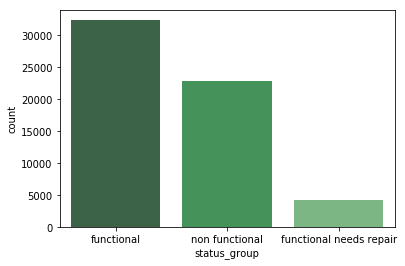

In [585]:
import seaborn as sns
sns.countplot(x=df_train_labels['status_group'], data=df_train_labels, palette="Greens_d");

In [592]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
from statsmodels.graphics.mosaicplot import mosaic

In [601]:
df_viz = pd.concat([df_train_features, df_train_labels['status_group']], axis=1)

In [603]:
df_viz.shape

(59400, 41)

/home/mishraka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/mishraka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


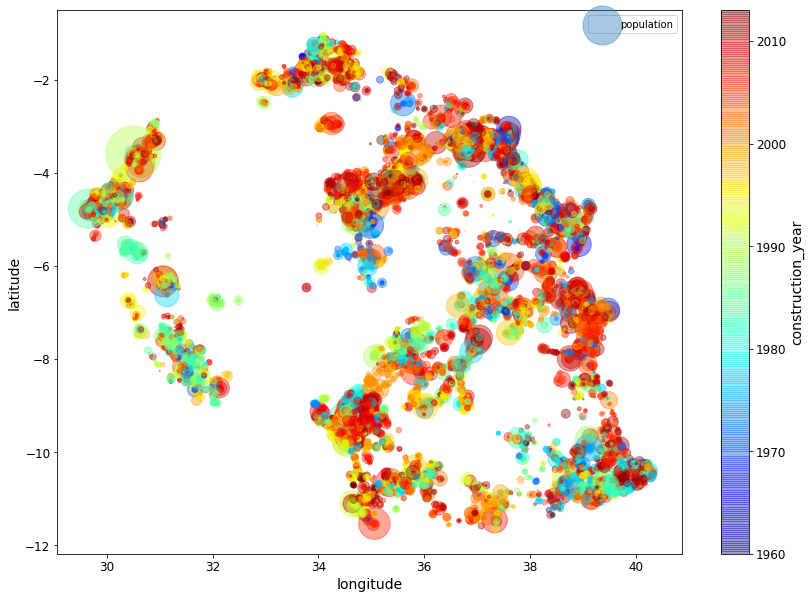

In [605]:
df_viz[df_viz['longitude']>0] [df_viz['latitude']<0][df_viz['construction_year']>0].plot\
(kind='scatter', x="longitude", y="latitude", alpha=0.4,
s=df_viz["population"]/10, label="population", figsize=(14,10),

c="construction_year", cmap=plt.get_cmap("jet"), colorbar=True,
sharex=False);
plt.legend;